In [ ]:
#source: https://www.kaggle.com/nageshsingh/mask-and-social-distancing-detection-using-vgg19/notebook

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
from scipy.spatial import distance
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

path = os.getcwd()
abspath = os.path.abspath(os.path.join(path, os.pardir))
path = abspath + '/odm_MASKS'

for dirname, _, filenames in os.walk(path + '/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/tf/src/odm_MASKS/input/annotations/maksssksksss0.xml
/tf/src/odm_MASKS/input/annotations/maksssksksss1.xml
/tf/src/odm_MASKS/input/annotations/maksssksksss10.xml
/tf/src/odm_MASKS/input/annotations/maksssksksss100.xml
/tf/src/odm_MASKS/input/annotations/maksssksksss101.xml
/tf/src/odm_MASKS/input/annotations/maksssksksss102.xml
/tf/src/odm_MASKS/input/annotations/maksssksksss103.xml
/tf/src/odm_MASKS/input/annotations/maksssksksss104.xml
/tf/src/odm_MASKS/input/annotations/maksssksksss105.xml
/tf/src/odm_MASKS/input/annotations/maksssksksss106.xml
/tf/src/odm_MASKS/input/annotations/maksssksksss107.xml
/tf/src/odm_MASKS/input/annotations/maksssksksss108.xml
/tf/src/odm_MASKS/input/annotations/maksssksksss109.xml
/tf/src/odm_MASKS/input/annotations/maksssksksss11.xml
/tf/src/odm_MASKS/input/annotations/maksssksksss110.xml
/tf/src/odm_MASKS/input/annotations/maksssksksss111.xml
/tf/src/odm_MASKS/input/annotations/maksssksksss112.xml
/tf/src/odm_MASKS/input/annotations/maksssksksss113.xm

/tf/src/odm_MASKS/input/Face Mask Dataset/Test/WithoutMask/4838.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Test/WithoutMask/4839.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Test/WithoutMask/4958.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Test/WithoutMask/4959.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Test/WithoutMask/4964.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Test/WithoutMask/4965.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Test/WithoutMask/4966.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Test/WithoutMask/4970.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Test/WithoutMask/4971.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Test/WithoutMask/4972.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Test/WithoutMask/4999.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Test/WithoutMask/5058.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Test/WithoutMask/5059.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Test/WithoutMask/5064.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Test/W

/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithMask/Augmented_247_4728298.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithMask/Augmented_247_5278848.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithMask/Augmented_247_9425314.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithMask/Augmented_248_1021229.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithMask/Augmented_248_4873939.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithMask/Augmented_248_5726104.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithMask/Augmented_248_6930283.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithMask/Augmented_249_2789288.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithMask/Augmented_249_3712910.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithMask/Augmented_249_4973637.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithMask/Augmented_249_8421900.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithMask/Augmented_24_1384511.png
/tf/s

/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithMask/Augmented_590_8848533.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithMask/Augmented_591_2512867.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithMask/Augmented_591_4334888.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithMask/Augmented_591_5369595.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithMask/Augmented_591_7147261.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithMask/Augmented_591_9823963.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithMask/Augmented_592_1632399.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithMask/Augmented_592_4272184.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithMask/Augmented_592_439557.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithMask/Augmented_592_6498261.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithMask/Augmented_592_8158320.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithMask/Augmented_593_1304443.png
/tf/s

/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/1013.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/1018.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/1019.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/102.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/1020.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/1021.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/1022.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/1023.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/1024.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/1025.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/1026.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/1027.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/103.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/1030.png
/tf/src/odm_MASKS/input/Face Mask Da

/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/290.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/2900.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/2901.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/2903.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/2908.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/2909.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/291.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/2914.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/2915.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/2917.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/2918.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/2919.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/292.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/2920.png
/tf/src/odm_MASKS/input/Face Mask Dat

/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/4871.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/4872.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/4873.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/4874.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/4875.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/4876.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/4877.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/4878.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/4879.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/488.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/4880.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/4881.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/4882.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Train/WithoutMask/4883.png
/tf/src/odm_MASKS/input/Face Mask D

/tf/src/odm_MASKS/input/Face Mask Dataset/Validation/WithMask/Augmented_713_5984829.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Validation/WithMask/Augmented_716_6696342.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Validation/WithMask/Augmented_721_4610762.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Validation/WithMask/Augmented_725_3898100.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Validation/WithMask/Augmented_726_3130124.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Validation/WithMask/Augmented_727_5161110.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Validation/WithMask/Augmented_728_496193.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Validation/WithMask/Augmented_730_7920578.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Validation/WithMask/Augmented_737_8095283.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Validation/WithMask/Augmented_739_7630163.png
/tf/src/odm_MASKS/input/Face Mask Dataset/Validation/WithMask/Augmented_746_2875662.png
/tf/src/odm_MASKS/input/Face Mask

In [36]:
#loading haarcascade_frontalface_default.xml
face_model = cv2.CascadeClassifier(f'{path}/input/haarcascades/haarcascade_frontalface_default.xml')

[[1650  102   91   91]]


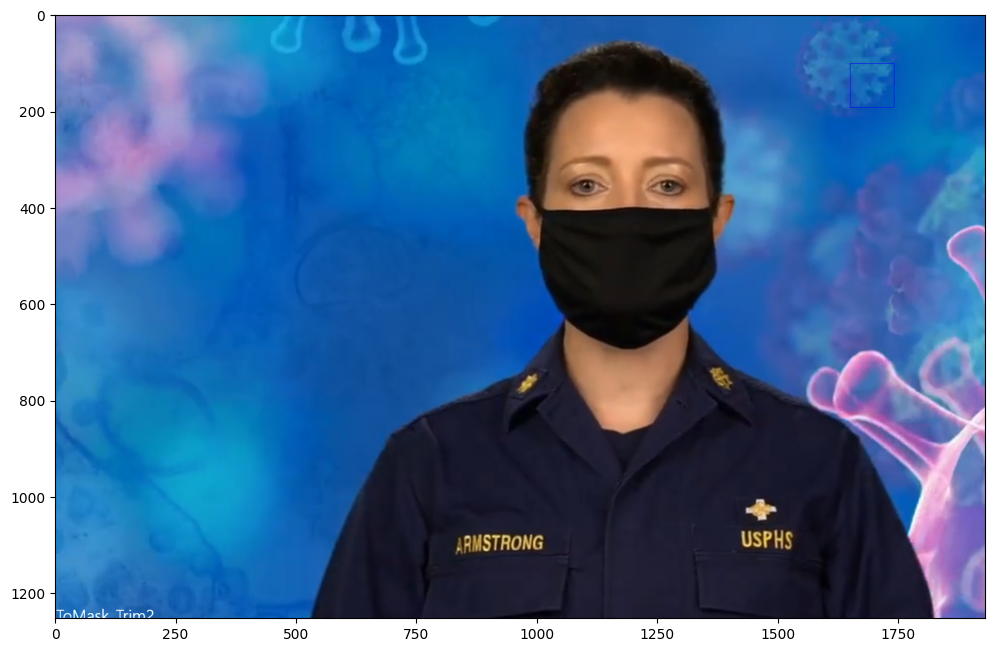

In [37]:
import matplotlib.pyplot as plt
#trying it out on a sample image
img = cv2.imread(f'{abspath}/test/Screenshot_1.png')
img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors=4) #returns a list of (x,y,w,h) tuples

out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image

print(faces)

#plotting
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),1)
plt.figure(figsize=(12,12))
plt.imshow(out_img)
plt.show()

In [34]:
MIN_DISTANCE = 130

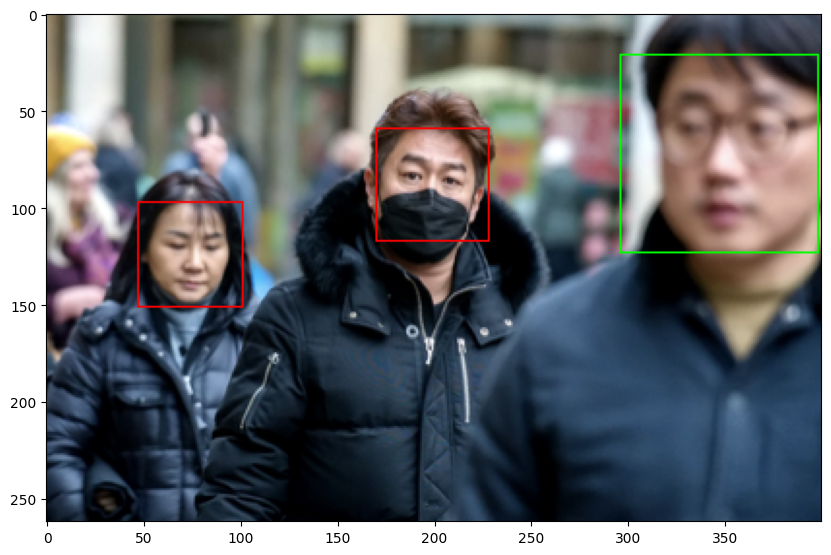

In [35]:
if len(faces)>=2:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        if label[i]==1:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(255,0,0),1)
        else:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(0,255,0),1)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)
    plt.show()
            
else:
    print("No. of faces detected is less than 2")

In [41]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [42]:
#Load train and test set
train_dir = f'{path}/input/Face Mask Dataset/Train'
test_dir = f'{path}/input/Face Mask Dataset/Test'
val_dir = f'{path}/input/Face Mask Dataset/Validation'

In [43]:
# Data augmentation targetsize -> 128 --> 224

train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2,shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(224,224),class_mode='categorical',batch_size=16)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(224,224),class_mode='categorical',batch_size=16)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(224,224),class_mode='categorical',batch_size=16)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [44]:
vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(224,224,3))

for layer in vgg19.layers:
    layer.trainable = False
    
model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(2,activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_4 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 2)                 50178     
                                                                 
Total params: 20,074,562
Trainable params: 50,178
Non-trainable params: 20,024,384
_________________________________________________________________


In [45]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")

In [46]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=len(train_generator)//32,
                              epochs=20,validation_data=val_generator,
                              validation_steps=len(val_generator)//32)

<ipython-input-46-71cc3d49c955>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/20
19/19 [==============================] - 4s 156ms/step - loss: 0.5169 - accuracy: 0.7961 - val_loss: 0.0903 - val_accuracy: 1.0000
Epoch 2/20
19/19 [==============================] - 3s 142ms/step - loss: 0.1934 - accuracy: 0.9342 - val_loss: 0.2528 - val_accuracy: 0.8750
Epoch 3/20
19/19 [==============================] - 3s 150ms/step - loss: 0.1011 - accuracy: 0.9507 - val_loss: 0.0280 - val_accuracy: 1.0000
Epoch 4/20
19/19 [==============================] - 3s 144ms/step - loss: 0.0669 - accuracy: 0.9737 - val_loss: 0.0774 - val_accuracy: 0.9375
Epoch 5/20
19/19 [==============================] - 3s 158ms/step - loss: 0.0693 - accuracy: 0.9737 - val_loss: 0.0428 - val_accuracy: 1.0000
Epoch 6/20
19/19 [==============================] - 3s 158ms/step - loss: 0.0540 - accuracy: 0.9803 - val_loss: 0.0533 - val_accuracy: 1.0000
Epoch 7/20
19/19 [==============================] - 3s 158ms/step - loss: 0.0743 - accuracy: 0.9770 - val_loss: 0.2558 - val_accuracy: 0.9375
Epoch 

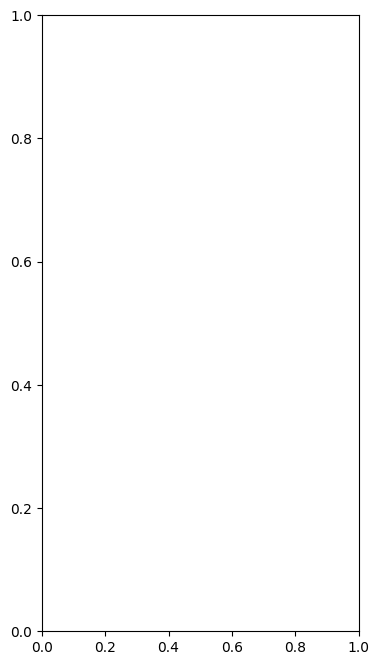

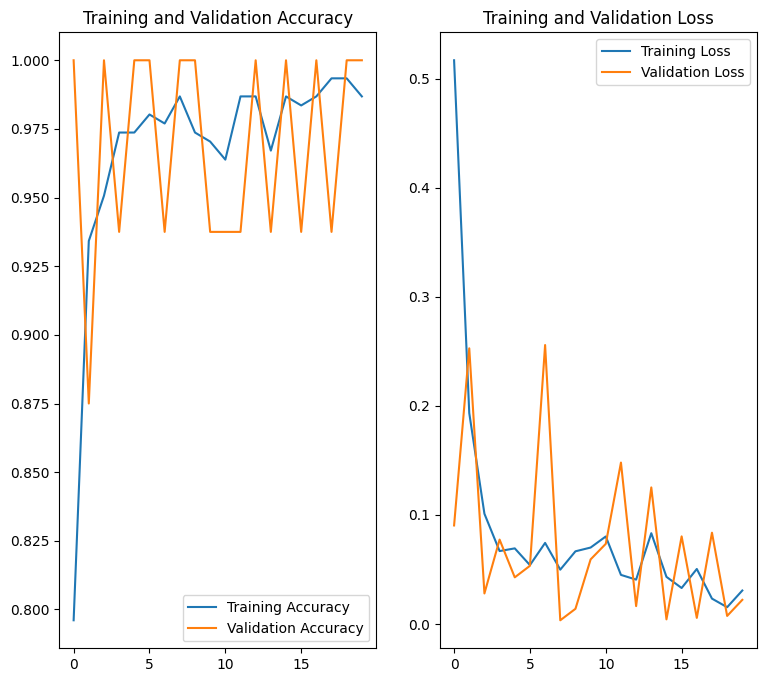

In [49]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(9, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [50]:
model.evaluate_generator(test_generator)

<ipython-input-50-faa0e9406f88>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator)


[0.04318360239267349, 0.9887499809265137]

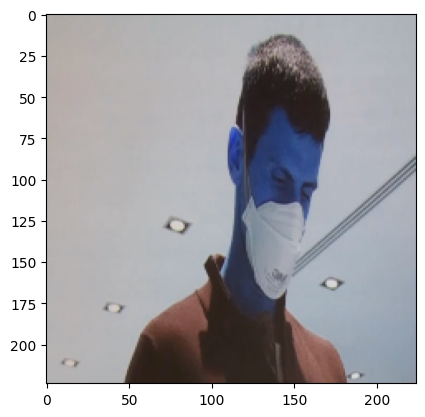

In [51]:
sample_mask_img = cv2.imread('/tf/src/test/Screenshot_2.png')
sample_mask_img = cv2.resize(sample_mask_img,(224,224))
plt.imshow(sample_mask_img)
sample_mask_img = np.reshape(sample_mask_img,[1,224,224,3])
sample_mask_img = sample_mask_img/255.0
plt.show()

In [52]:
model.predict(sample_mask_img)

array([[0.9818702, 0.0292068]], dtype=float32)

In [46]:
# Load the TensorBoard notebook extension
%reload_ext tensorboard
%tensorboard --logdir /logs/fit/ --host 0.0.0.0

Reusing TensorBoard on port 6008 (pid 23252), started 0:00:55 ago. (Use '!kill 23252' to kill it.)

In [53]:
model.save(f'{abspath}/models/maskModel/v4/masknet.h5')

In [35]:
mask_label = {0:'MASK',1:'NO MASK'}
dist_label = {0:(0,255,0),1:(255,0,0)}

In [31]:
if len(faces)>=2:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        crop = new_img[y:y+h,x:x+w]
        crop = cv2.resize(crop,(128,128))
        crop = np.reshape(crop,[1,128,128,3])/255.0
        mask_result = model.predict(crop)
        cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,dist_label[label[i]],2)
        cv2.rectangle(new_img,(x,y),(x+w,y+h),dist_label[label[i]],1)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)
    plt.show()
            
else:
    print("No. of faces detected is less than 2")

NameError: name 'faces' is not defined

In [42]:
from tensorflow import keras
classifier = keras.models.load_model(f'{abspath}/models/classification/newClass/')
classifier.predict(sample_mask_img)

ValueError: in user code:

    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1572, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model_3" is incompatible with the layer: expected shape=(None, 160, 160, 3), found shape=(None, 128, 128, 3)
